In [1]:
# VER README
# Notebooks con Markdown en celdas de coódigo para renderizar sin celdas ni prompt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tabulate import tabulate
from IPython.display import Markdown as md

%matplotlib inline

# Data
DATA_PATH = "data/"

# Funciones
rnd = lambda x: round(x, 2)

# Caracterización de un contador Geiger-Muller

Se realizan una serie de medidas en el laboratorio con la idea de hacer la caracterización de un contador Geiger-Muller (G-M).

## Curva característica

En primer lugar se mide la actividad de una muestra radiactiva de cobalto 60 $Co^{60}$ y estroncio 90 $Sr^{90}$ variando la tensión de entrada.

In [2]:
# Datos curva característica

# fuente: cobalto 60
# tiempo de medida: 90s
t_p1 = 90
# medidas: practica1_curva.csv donde columnas son la tensión en voltios y el número de cuentas
data1_p1 = DATA_PATH + "practica1_curva.csv"
df1_p1 = pd.read_csv(data1_p1)
df1_p1["bq"] = df1_p1["cuentas"]/t_p1
#df1_p1.style
print(tabulate(df1_p1, headers="keys", tablefmt="presto"))

    |   tension |   cuentas |        bq
----+-----------+-----------+-----------
  0 |       360 |        85 |  0.944444
  1 |       400 |      2099 | 23.3222
  2 |       440 |      4232 | 47.0222
  3 |       480 |      4187 | 46.5222
  4 |       520 |      4352 | 48.3556
  5 |       560 |      4265 | 47.3889
  6 |       600 |      4260 | 47.3333
  7 |       640 |      4393 | 48.8111
  8 |       680 |      4438 | 49.3111
  9 |       720 |      4451 | 49.4556
 10 |       760 |      4508 | 50.0889
 11 |       800 |      4724 | 52.4889
 12 |       840 |      4914 | 54.6
 13 |       880 |      5292 | 58.8


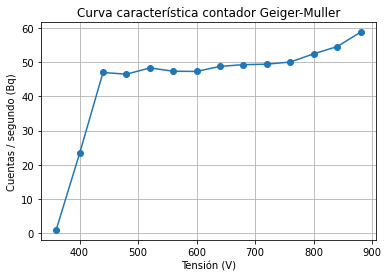

In [3]:
plt.plot(df1_p1["tension"], df1_p1["bq"], '-o')
#plt.legend(loc='top_right')
plt.title('Curva característica contador Geiger-Muller')
plt.xlabel('Tensión (V)')
plt.ylabel('Cuentas / segundo (Bq)')
plt.grid(True)
plt.show()

In [4]:
V_u = df1_p1["tension"][2]
V_i = df1_p1["tension"][3]
V_f = df1_p1["tension"][10]
l_meseta = V_f-V_i
V_t = df1_p1["tension"][3] + 100
R_i = round(df1_p1["bq"][3], 2)
R_f = round(df1_p1["bq"][10], 2)

TEXT = f"Por inspección visual podemos ver que la tensión umbral viene dada por el valor $V_u={V_u}V$. \
         La longitud de la meseta en este caso sería $V_f - V_i = {V_f} - {V_i} = {l_meseta}V$, \
         siendo $V_f$ y $V_i$ la tensión al comienzo y al final de la meseta.\
         \
         Puesto que la longitud de la meseta es superior a 200V tenemos que la tensión de trabajo es $V_t = V_i + 100 ={V_t}V$"

md(TEXT)

Por inspección visual podemos ver que la tensión umbral viene dada por el valor $V_u=440V$.          La longitud de la meseta en este caso sería $V_f - V_i = 760 - 480 = 280V$,          siendo $V_f$ y $V_i$ la tensión al comienzo y al final de la meseta.                  Puesto que la longitud de la meseta es superior a 200V tenemos que la tensión de trabajo es $V_t = V_i + 100 =580V$

La pendiente relativa al punto medio de la meseta expresada en tanto por ciento por 100V viene data por la expresión
$$
P = \frac{\frac{R_f - R_i}{(R_f + R_i)/2}}{(V_f - V_i)/100}x100
$$

In [5]:
P = 100 * ((R_f - R_i) / ((R_f + R_i)/2)) / ((V_f - V_i)/100)
P = rnd(P)

TEXT = f"Siendo $R_i = {R_i}$, $R_f={R_f}$ los Bq al comienzo y final de la meseta, respectivamente. \
         Con estos datos obtenemos un valor de $P={P}$ en % (por 100V)"

md(TEXT)

Siendo $R_i = 46.52$, $R_f=50.09$ los Bq al comienzo y final de la meseta, respectivamente.          Con estos datos obtenemos un valor de $P=2.64$ en % (por 100V)

## Fondo

Mediante el método de las dos fuentes podemos calcular el tiempo de resolución del contador Geiger-Muller. Si se mide durante 90s la actividad de una muestra de $Co^{60}$ y $Sr^{90}$, obtenemos la siguiente tabla

In [6]:
# Datos detección de fondo

# fuente: cobalto 60, estroncio 90
# tiempo de medida: 90s
t_p1 = 90
# medidas: practica1_fondo.csv
data2_p1 = DATA_PATH + "practica1_fondo.csv"
df2_p1 = pd.read_csv(data2_p1, index_col="cuentas")
df2_p1 = df2_p1.T

df2_p1["media"] = df2_p1.mean(axis=1)
df2_p1["bq"] = df2_p1["media"]/t_p1
df2_p1["bq"] = df2_p1["bq"].map(rnd)
print(tabulate(df2_p1, headers="keys", tablefmt="presto"))

     |    0 |    1 |    2 |    3 |   media |    bq
-----+------+------+------+------+---------+-------
 A1  | 4036 | 4110 | 4096 | 4082 | 4081    | 45.34
 A12 | 7577 | 7545 | 7630 | 7433 | 7546.25 | 83.85
 A2  | 3750 | 3806 | 3833 | 3819 | 3802    | 42.24
 F   |   27 |   14 |   30 |   29 |   25    |  0.28


Donde $A_1$ corresponde a la actividad de la muestra de cobalto, $A_2$ a la muestra de estroncio, $A_{12}$ la actividad de ambas muestras y $F$ la radiación de fondo (sin muestra). Con estas medidas podemos calcular el tiempo de resolución del contador mediante la siguiente fórmula

$$
\tau = \frac{A_{12} + F - A_1 - A_2}{A_1^2 + A_2^2 - F^2 - A_{12}^2}
$$

In [7]:
A1 = df2_p1["bq"]["A1"]
A12 = df2_p1["bq"]["A12"]
A2 = df2_p1["bq"]["A2"]
F = df2_p1["bq"]["F"]

tau = (A12+F-A1-A2) / ((A1*A1) + (A2*A2) - (F*F) - (A12*A12))

TEXT = f"Sustituyendo valores obtenemos que el tiempo de resolución es ${round(tau, 4)}s$"

md(TEXT)

Sustituyendo valores obtenemos que el tiempo de resolución es $0.0011s$

## Eficiencia del detector

In [8]:
# Datos Cobalto 60
L_co = 4537 # número de cuentas (dato)
# F # fondo (cuentas)
tasa_recuento_neta_co = (L_co-F)/t_p1 # bq
actividad_inicial_co = 37000 # bq
tiempo_medicion_co = 1.92 # años, abril 2010 a marzo 2012
periodo_co = 5.26 # años
lambda_co = np.log(2)/periodo_co # años^(-1)
actividad_corregida_co = actividad_inicial_co*np.e**(-lambda_co*tiempo_medicion_co) # bq
epsilon_co = tasa_recuento_neta_co/actividad_corregida_co


**Fuente: $Co^{60}$**

- Tipo de emisión: emisión $\beta^{-}$ y $\gamma$

- Tiempo de medida: $t=90s$

- Número de cuentas: $L=4537$

- Fondo: $F = 25$

- Tasa de recuento neta: $A'= \frac{(L-F)}{t} = 50.13 Bq$

- Actividad inicial de la muestra: $A_0 = 1 \mu Ci = 37000 Bq$

- Fecha: abril 2010. Tiempo transcurrido hasta marzo 2012 cuando fueron tomadas las medidas: $T_m = 23 meses (1.92 a)$

- Período: $T_{1/2} = 5.26 a -> \lambda = \frac{ln2}{T_{1/2}} = 0.13 a^{-1}$

- Actividad corregida: $A = A_0e^{- \lambda T_m} = 28728 Bq$

- Eficiencia $\epsilon = A'/A = 0.0018$

In [9]:
# Datos Estroncio 90
L_sr = 34212 # número de cuentas (dato)
# F # fondo (cuentas)
tasa_recuento_neta_sr = (L_sr-F)/t_p1 # bq
actividad_inicial_sr = 3700 # bq
tiempo_medicion_sr = 1.83 # años, mayo 2010 a marzo 2012
periodo_sr = 28.5 # años
lambda_sr = np.log(2)/periodo_sr # años^(-1)
actividad_corregida_sr = actividad_inicial_sr*np.e**(-lambda_sr*tiempo_medicion_sr) # bq
epsilon_sr = tasa_recuento_neta_sr/actividad_corregida_sr


**Fuente: $Sr^{90}$**

- Tipo de emisión: emisión $\beta^{-}$

- Tiempo de medida: $t=90s$

- Número de cuentas: $L=34212$

- Fondo: $F = 25$

- Tasa de recuento neta: $A'= \frac{(L-F)}{t} = 380.13 Bq$

- Actividad inicial de la muestra: $A_0 = 0.1 \mu Ci = 3700 Bq$

- Fecha: mayo 2010. Tiempo transcurrido hasta marzo 2012 cuando fueron tomadas las medidas: $T_m = 22 meses (1.83 a)$

- Período: $T_{1/2} = 28.5 a -> \lambda = \frac{ln2}{T_{1/2}} = 0.024 a^{-1}$

- Actividad corregida: $A = A_0e^{- \lambda T_m} = 3538.93 Bq$

- Eficiencia $\epsilon = A'/A = 0.11$

## Conclusiones

La construcción de la curva característica de un detector Geiger-Muller permite determinar el potencial óptimo de trabajo del dispositivo.

La pendiente de la meseta de un detector Geiger ordinario suele estar entorno al 2%-3%, resultado que concuerda en gran medida con el valor hallado en este experimento (2.64%).

En cuanto al tiempo de respuesta de nuestro detector, podemos decir que es de respuesta lenta $\tau = 0.0011s$, ya que existen detectores con un tiempo de resolución del microsegundo. 

Es importante recalcar que conservar la posición de las muestras a lo largo del experimento es importante puesto que la eficiencia del detector, en especial la eficiencia geométrica, depende de la distancia a la fuente de partículas. En cuanto a la eficiencia según el tipo de fuente emisora, tenemos dos casos por analizar:

- Radiación gamma $\gamma$: al ser radiación de alta energía tenemos que la mayoría de los fotones emitidos atraviesan el contador con mínima interacción. Cabe preguntarse si nuestro detector cumple los estándares habituales. Dado que los detectores G-M para la radiación gamma suelen tener una eficiencia de entorno al 1% (o incluso menor) podemos concluir que nuestro detector sigue dicha normalidad, pues el valor obtenido es de entorno al $\epsilon = 0.18$ %

- Radiación beta $\beta$: los contadores G-M se caracterizan por ser buenos detectores de este tipo de radiación (corto alcance), por lo que suelen tener eficiencias muy cercanas al 100%, sin embargo, nuestro detector G-M ofrece una eficiencia de entorno al 11%, con lo que no podemos concluir que sea especialmente bueno para este tipo de radiación (al contrario que con la radiación gamma).

Por ahora hemos analizado la eficiencia del detector G-M según el tipo de radiación, pero es importante aclarar que la eficiencia absoluta no solo depende de este factor sino que también de factores geométricos (como ya hemos comentado anteriormente sobre la posición de las partículas). La relación entre las distintas eficiencias que puede resumirse según la fórmula $\epsilon_t = \epsilon_{geo} x \epsilon_{i}$, y aquí intervienen factores que pueden ser muy determinantes como son la energía de la radiación, la probabilidad de interacción en el detector, el tiempo de respuesta del detector, sus materiales de fabricación, su tamaño, etc.

Con todo lo dicho anteriormente, y teniendo en cueta las medidas tomadas y los cálculos realizados, podemos llegar a la conclusión de que hemos realizado una correcta caracterización de nuestro detector G-M.